In [6]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline 
import datetime as dt
from datetime import datetime 

# 1. For each day, determine the count of users that joined and were acquiredthrough Google. Plot this and confirm there is an inflection point on or near 2017-04-12

#### Historically, this company spent an average of 30 dollars per account to advertise in the 2nd position on Google. However, on 2017-04-12 , they decided to start biddingor the 1st position. Since 2017-04-12 , they have spent 210,285 dollars in total.

In [2]:
people_person = pd.read_csv('drive-download-20180422T230536Z-001/people_person.csv')
people_person.head()

,id,first_name,last_name,email,channel,date_joined,photo,fee,gender
0,1,Meaghan,Lapete,meaghan.lapete820@aol.com,NaN,2015-07-12 15:13:16.673652,https://placekitten.com/360/208,0.0,f
1,2,Aracelis,Luhr,aracelis.luhr844@rover.com,NaN,2015-07-12 13:44:21.949482,https://placekitten.com/392/227,0.0,f
2,3,Vernita,Amodei,vernita.amodei542@rover.com,NaN,2015-07-12 11:36:06.992714,https://placekitten.com/275/300,0.0,f
3,4,Marlin,Flamm,marlin.flamm613@yahoo.com,NaN,2015-07-12 12:23:43.627071,https://placekitten.com/254/257,0.0,f
4,5,Eugena,Rigger,eugena.rigger847@yahoo.com,NaN,2015-07-12 07:40:36.724086,https://placekitten.com/222/370,0.0,f


In [4]:
people_person.channel.value_counts()

Google      14317
WOM         12528
Facebook    12515
Yelp        12425
Name: channel, dtype: int64

In [7]:
people_person['date_joined'] = pd.to_datetime(people_person['date_joined'])

In [8]:
people_person['date'] = people_person.date_joined.dt.date
people_person.head()

,id,first_name,last_name,email,channel,date_joined,photo,fee,gender,date
0,1,Meaghan,Lapete,meaghan.lapete820@aol.com,NaN,2015-07-12 15:13:16.673652,https://placekitten.com/360/208,0.0,f,2015-07-12
1,2,Aracelis,Luhr,aracelis.luhr844@rover.com,NaN,2015-07-12 13:44:21.949482,https://placekitten.com/392/227,0.0,f,2015-07-12
2,3,Vernita,Amodei,vernita.amodei542@rover.com,NaN,2015-07-12 11:36:06.992714,https://placekitten.com/275/300,0.0,f,2015-07-12
3,4,Marlin,Flamm,marlin.flamm613@yahoo.com,NaN,2015-07-12 12:23:43.627071,https://placekitten.com/254/257,0.0,f,2015-07-12
4,5,Eugena,Rigger,eugena.rigger847@yahoo.com,NaN,2015-07-12 07:40:36.724086,https://placekitten.com/222/370,0.0,f,2015-07-12


In [9]:
target_google = people_person[people_person['channel'] == "Google"]
target_google.head()

,id,first_name,last_name,email,channel,date_joined,photo,fee,gender,date
100,101,Dara,Lagomarsino,dara.lagomarsino212@rover.com,Google,2017-03-02 03:53:34.338356,https://placekitten.com/284/376,0.07,f,2017-03-02
106,107,Denny,Prag,denny.prag739@rover.com,Google,2017-03-20 10:13:24.111015,https://placekitten.com/246/236,0.07,m,2017-03-20
109,110,Noelle,Wiland,noelle.wiland664@gmail.com,Google,2016-07-25 16:54:17.162838,https://placekitten.com/373/228,0.05,f,2016-07-25
111,112,Yolando,Rattell,yolando.rattell579@hotmail.com,Google,2017-05-20 22:38:19.369885,https://placekitten.com/260/297,0.07,f,2017-05-20
114,115,Martina,Dipanfilo,martina.dipanfilo709@yahoo.com,Google,2016-12-31 20:03:58.996403,https://placekitten.com/240/369,0.07,f,2016-12-31


In [10]:
target_google = target_google.sort_values('date').copy()
target_google.head(2)

,id,first_name,last_name,email,channel,date_joined,photo,fee,gender,date
29616,29617,Chris,Willetts,chris.willetts250@hotmail.com,Google,2015-07-16 15:11:49.047635,https://placekitten.com/298/283,0.02,m,2015-07-16
47404,47405,Arnita,Veenstra,arnita.veenstra249@aol.com,Google,2015-07-17 08:14:24.569700,https://placekitten.com/389/371,0.02,f,2015-07-17


In [11]:
count_google = target_google.groupby(['date'], as_index=False).channel.count()
count_google.head()

,date,channel
0,2015-07-16,1
1,2015-07-17,1
2,2015-07-25,1
3,2015-07-26,1
4,2015-07-27,1


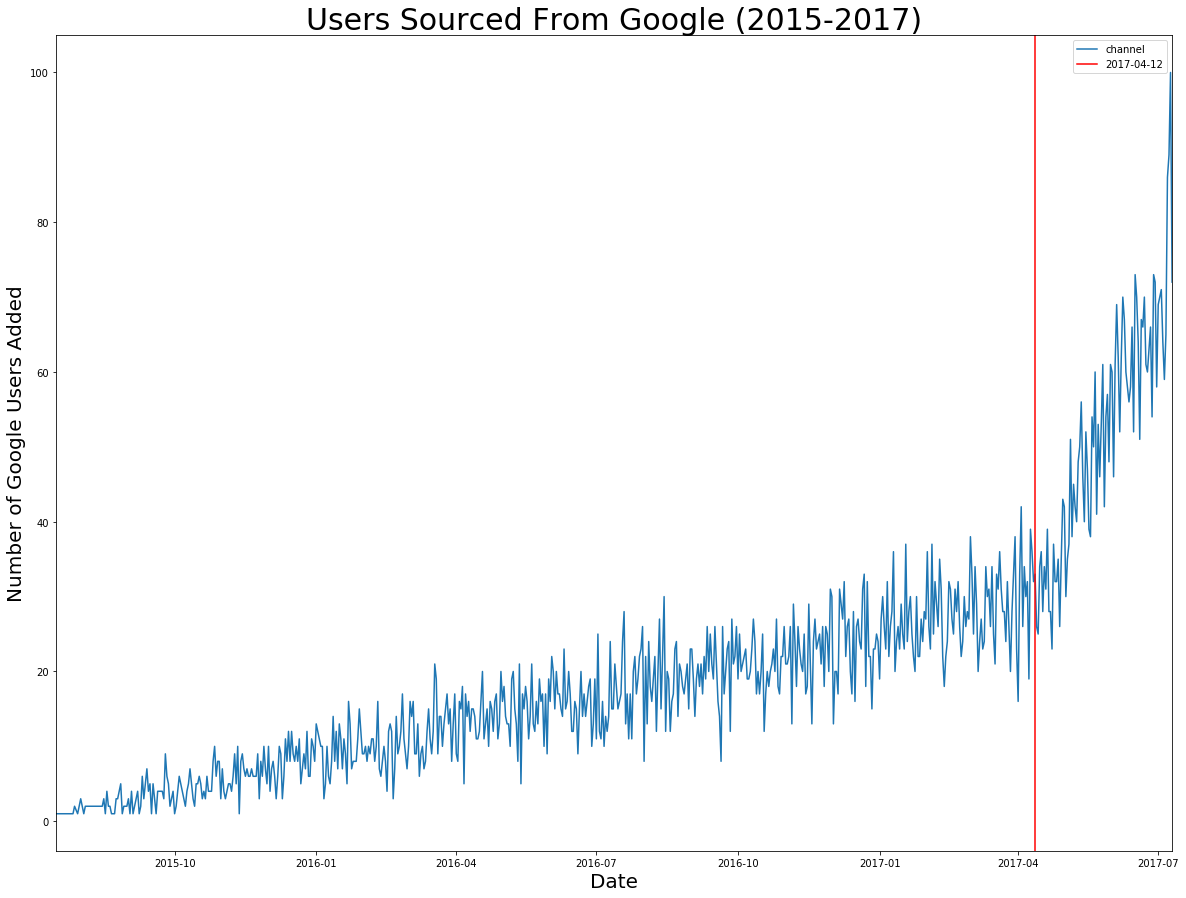

In [26]:
count_google.plot(x='date', y='channel', figsize=(20,15))
plt.title("Users Sourced From Google (2015-2017)", fontsize= 30)
plt.axvline(dt.datetime(2017, 4, 12), color='r', label = '2017-04-12')
plt.xlabel('Date', fontsize= 20)
plt.ylabel('Number of Google Users Added', fontsize= 20)
plt.legend();

# 2. How many users were acquired via Google advertising since 2017-04-12 and what was the average cost per account?

In [30]:
target_google.head()

,id,first_name,last_name,email,channel,date_joined,photo,fee,gender,date
29616,29617,Chris,Willetts,chris.willetts250@hotmail.com,Google,2015-07-16 15:11:49.047635,https://placekitten.com/298/283,0.02,m,2015-07-16
47404,47405,Arnita,Veenstra,arnita.veenstra249@aol.com,Google,2015-07-17 08:14:24.569700,https://placekitten.com/389/371,0.02,f,2015-07-17
13472,13473,Ruben,Cohick,ruben.cohick941@yahoo.com,Google,2015-07-25 15:20:39.575314,https://placekitten.com/236/359,0.02,m,2015-07-25
20014,20015,Deon,Mccain,deon.mccain616@aol.com,Google,2015-07-26 22:59:14.543321,https://placekitten.com/251/305,0.02,f,2015-07-26
45623,45624,Eli,Lewin,eli.lewin448@yahoo.com,Google,2015-07-27 01:09:42.950760,https://placekitten.com/385/296,0.02,m,2015-07-27


In [31]:
target_google['date'] = target_google['date'].astype('str')

In [32]:
window = target_google['date'] >= '2017-04-12'

In [36]:
google_after_april = target_google[window]
google_after_april.head()

,id,first_name,last_name,email,channel,date_joined,photo,fee,gender,date
39379,39380,Peter,Zarn,peter.zarn319@hotmail.com,Google,2017-04-12 22:25:53.616845,https://placekitten.com/224/222,0.07,m,2017-04-12
25002,25003,Gabriele,Cichon,gabriele.cichon562@yahoo.com,Google,2017-04-12 11:08:37.037675,https://placekitten.com/377/292,0.07,f,2017-04-12
46377,46378,Senaida,Tobery,senaida.tobery469@rover.com,Google,2017-04-12 02:30:13.359097,https://placekitten.com/265/361,0.07,f,2017-04-12
14311,14312,Dale,Bartoszek,dale.bartoszek508@yahoo.com,Google,2017-04-12 04:58:04.939801,https://placekitten.com/240/359,0.07,f,2017-04-12
15721,15722,Echo,Purl,echo.purl652@aol.com,Google,2017-04-12 19:07:16.838284,https://placekitten.com/230/204,0.07,f,2017-04-12


In [44]:
google_after_april.tail()

,id,first_name,last_name,email,channel,date_joined,photo,fee,gender,date
11851,11852,Cleotilde,Odonal,cleotilde.odonal647@hotmail.com,Google,2017-07-10 21:50:44.756546,https://placekitten.com/307/240,0.07,f,2017-07-10
63829,63830,Wilford,Mclaurine,wilford.mclaurine864@yahoo.com,Google,2017-07-10 19:10:55.184093,https://placekitten.com/325/285,0.07,m,2017-07-10
15637,15638,Anastacia,Madyun,anastacia.madyun219@gmail.com,Google,2017-07-10 01:28:46.108539,https://placekitten.com/329/363,0.07,f,2017-07-10
7459,7460,Dawna,Naegle,dawna.naegle699@aol.com,Google,2017-07-10 15:53:08.516025,https://placekitten.com/211/245,0.07,f,2017-07-10
63244,63245,Eve,Helander,eve.helander608@gmail.com,Google,2017-07-10 04:42:20.759840,https://placekitten.com/377/283,0.07,f,2017-07-10


In [43]:
count_google_after_april = len(google_after_april)
count_google_after_april

4673

In [45]:
average_cost = 210285 / count_google_after_april
average_cost

45.0

## Summary:

After the April 12th focal date the company added 4,673 new users through Google search engine marketing.

The average cost per user acquired is $45.

# 3. Estimate how many users would have been acquired had the company not changed its bidding strategy. What would have been the marketing spend in that case?

In [46]:
people_person.head()

,id,first_name,last_name,email,channel,date_joined,photo,fee,gender,date
0,1,Meaghan,Lapete,meaghan.lapete820@aol.com,NaN,2015-07-12 15:13:16.673652,https://placekitten.com/360/208,0.0,f,2015-07-12
1,2,Aracelis,Luhr,aracelis.luhr844@rover.com,NaN,2015-07-12 13:44:21.949482,https://placekitten.com/392/227,0.0,f,2015-07-12
2,3,Vernita,Amodei,vernita.amodei542@rover.com,NaN,2015-07-12 11:36:06.992714,https://placekitten.com/275/300,0.0,f,2015-07-12
3,4,Marlin,Flamm,marlin.flamm613@yahoo.com,NaN,2015-07-12 12:23:43.627071,https://placekitten.com/254/257,0.0,f,2015-07-12
4,5,Eugena,Rigger,eugena.rigger847@yahoo.com,NaN,2015-07-12 07:40:36.724086,https://placekitten.com/222/370,0.0,f,2015-07-12


In [47]:
people_person['date'] = people_person['date'].astype('str')

In [54]:
pre_strategy = people_person.date < '2017-04-12'

In [55]:
pre_strategy_users = people_person[pre_strategy]
pre_strategy_users.head()

,id,first_name,last_name,email,channel,date_joined,photo,fee,gender,date
0,1,Meaghan,Lapete,meaghan.lapete820@aol.com,NaN,2015-07-12 15:13:16.673652,https://placekitten.com/360/208,0.0,f,2015-07-12
1,2,Aracelis,Luhr,aracelis.luhr844@rover.com,NaN,2015-07-12 13:44:21.949482,https://placekitten.com/392/227,0.0,f,2015-07-12
2,3,Vernita,Amodei,vernita.amodei542@rover.com,NaN,2015-07-12 11:36:06.992714,https://placekitten.com/275/300,0.0,f,2015-07-12
3,4,Marlin,Flamm,marlin.flamm613@yahoo.com,NaN,2015-07-12 12:23:43.627071,https://placekitten.com/254/257,0.0,f,2015-07-12
4,5,Eugena,Rigger,eugena.rigger847@yahoo.com,NaN,2015-07-12 07:40:36.724086,https://placekitten.com/222/370,0.0,f,2015-07-12


In [56]:
pre_strategy_google = pre_strategy_users[pre_strategy_users['channel'] == "Google"].sort_values(by='date')

In [57]:
pre_strategy_google.head()

,id,first_name,last_name,email,channel,date_joined,photo,fee,gender,date
29616,29617,Chris,Willetts,chris.willetts250@hotmail.com,Google,2015-07-16 15:11:49.047635,https://placekitten.com/298/283,0.02,m,2015-07-16
47404,47405,Arnita,Veenstra,arnita.veenstra249@aol.com,Google,2015-07-17 08:14:24.569700,https://placekitten.com/389/371,0.02,f,2015-07-17
13472,13473,Ruben,Cohick,ruben.cohick941@yahoo.com,Google,2015-07-25 15:20:39.575314,https://placekitten.com/236/359,0.02,m,2015-07-25
20014,20015,Deon,Mccain,deon.mccain616@aol.com,Google,2015-07-26 22:59:14.543321,https://placekitten.com/251/305,0.02,f,2015-07-26
45623,45624,Eli,Lewin,eli.lewin448@yahoo.com,Google,2015-07-27 01:09:42.950760,https://placekitten.com/385/296,0.02,m,2015-07-27


In [60]:
count_pre_strategy_google = len(pre_strategy_google)
count_pre_strategy_google

9644

9644 is the amount of new users that came from Google before the 2017-04-12 shift in strategy.

In [61]:
pre_strategy_google.head(1)

,id,first_name,last_name,email,channel,date_joined,photo,fee,gender,date
29616,29617,Chris,Willetts,chris.willetts250@hotmail.com,Google,2015-07-16 15:11:49.047635,https://placekitten.com/298/283,0.02,m,2015-07-16


In [62]:
pre_strategy_google.tail(1)

,id,first_name,last_name,email,channel,date_joined,photo,fee,gender,date
58031,58032,Arnulfo,Essler,arnulfo.essler514@aol.com,Google,2017-04-11 23:29:13.202312,https://placekitten.com/361/333,0.07,m,2017-04-11


2015-07-16 to 2017-04-11 is the period before the shift in strategy, we need to figure out the number of days this is.


In [64]:
start = datetime(2015,7,16)
end = datetime(2017,4,12)
pre_time_period = end - start
pre_time_period

datetime.timedelta(636)

The number of users per day added before the shift can be calculated as the count_pre_strategy_google divided by the by number of days.

In [66]:
users_per_day = 9644 / 636
users_per_day

15.163522012578616

Before the shift in strategy the platform was adding 15 users per day

Marketing spend was $30 per user, we can calculate the cost by multiplying the number of users added per day under the old regime by this cost. 

In [69]:
new_start = datetime(2017,4,12)
new_end = datetime(2017,7,11)
new_timedelta = new_end - new_start
new_timedelta

datetime.timedelta(90)

90 days is the time period between the current snapshot and the shift, if we multiply the average users per day by this we can figure out how many users would have been added.

In [70]:
users_per_day * 90

1364.7169811320755

Rounds up to 1365 users.

The cost of this would be 30 * 1365 = 40,950

In [71]:
cost = 30 * 1365
cost

40950

### Summary

Before the change in strategy the platform was adding 15 users per day at a cost of $30/user. In the 636 day window this meant that 9644 users were added. Had the company not changed tactics on 2017-04-12 the site would have added 1365 users at a cost of 40,950

# 4. How many additional accounts where created? What was the marginal cost per account for these additional accounts?